In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reading Dataset 

In [3]:
!pwd
!ls

/home/mitra/IIITG/Machine_Learning/LinearRegression
 imports-85.data  'Linear regression Automobile Data Set.ipynb'   slr06.csv


In [4]:
df=pd.read_csv('/home/mitra/IIITG/Machine_Learning/LinearRegression/imports-85.data',names=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"])
df.head(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

     symboling normalized-losses           make fuel-type aspiration  \
0            3                 ?    alfa-romero       gas        std   
1            3                 ?    alfa-romero       gas        std   
2            1                 ?    alfa-romero       gas        std   
3            2               164           audi       gas        std   
4            2               164           audi       gas        std   
5            2                 ?           audi       gas        std   
6            1               158           audi       gas        std   
7            1                 ?           audi       gas        std   
8            1               158           audi       gas      turbo   
9            0                 ?           audi       gas      turbo   
10           2               192            bmw       gas        std   
11           0               192            bmw       gas        std   
12           0               188            bmw       gas       

### As index 9,44,45,129 contain no values in price column, we can replace it to 0 or average of all or simply remove those

In [6]:
def input_age(cols):
    price=cols[0]
    if price=='?':
        return 0
    else:
        return price

In [7]:
df['price']=df[['price']].apply(input_age,axis=1)

In [8]:
def input_age(cols):
    bore=cols[0]
    if bore=='?':
        return 0
    else:
        return bore

In [9]:
df['bore']=df[['bore']].apply(input_age,axis=1)

In [10]:
def input_age(cols):
    stroke=cols[0]
    if stroke=='?':
        return 0
    else:
        return stroke

In [11]:
df['stroke']=df[['stroke']].apply(input_age,axis=1)

In [12]:
def input_age(cols):
    horsepower=cols[0]
    if horsepower=='?':
        return 0
    else:
        return horsepower

In [13]:
df['horsepower']=df[['horsepower']].apply(input_age,axis=1)

In [14]:
def input_age(cols):
    peakrpm=cols[0]
    if peakrpm=='?':
        return 0
    else:
        return peakrpm

In [15]:
df['peak-rpm']=df[['peak-rpm']].apply(input_age,axis=1)

In [16]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

     symboling normalized-losses           make fuel-type aspiration  \
0            3                 ?    alfa-romero       gas        std   
1            3                 ?    alfa-romero       gas        std   
2            1                 ?    alfa-romero       gas        std   
3            2               164           audi       gas        std   
4            2               164           audi       gas        std   
5            2                 ?           audi       gas        std   
6            1               158           audi       gas        std   
7            1                 ?           audi       gas        std   
8            1               158           audi       gas      turbo   
9            0                 ?           audi       gas      turbo   
10           2               192            bmw       gas        std   
11           0               192            bmw       gas        std   
12           0               188            bmw       gas       

# EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Finding Null value

<AxesSubplot:>

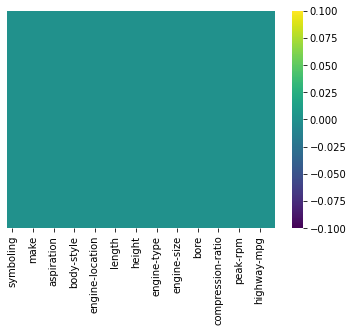

In [18]:
sns.heatmap(df.isnull(),yticklabels=False, cmap='viridis')

# Change categorical Values into Numerical values

## 1. make

In [19]:
Make=pd.get_dummies(df['make'])
Make.columns=["alfa-romero", "audi", "bmw", "chevrolet", "dodge", "honda","isuzu", "jaguar", "mazda", "mercedes-benz", "mercury","mitsubishi", "nissan", "peugot", "plymouth", "porsche","renault", "saab", "subaru", "toyota", "volkswagen", "volvo"]

In [20]:
Make.head()

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. fuel-type

In [21]:
Fueltype=pd.get_dummies(df['fuel-type'])
Fueltype.columns=["diesel", "gas"]
Fueltype.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## 3. aspiration

In [22]:
Aspiration=pd.get_dummies(df['aspiration'])
Aspiration.columns=["std","turbo"]
Aspiration.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


## 4. num-of-doors

In [23]:
Numofdoors=pd.get_dummies(df['num-of-doors'])
Numofdoors.columns=["four","two","?"]
Numofdoors.head()

,four,two,?
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


## 5. body-style

In [24]:
Bodystyle=pd.get_dummies(df['body-style'])
Bodystyle.columns=['hardtop', 'wagon', 'sedan', 'hatchback', 'convertible']
Bodystyle.head()

,hardtop,wagon,sedan,hatchback,convertible
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


## 6. drive-wheels

In [25]:
Drivewheels=pd.get_dummies(df['drive-wheels'])
Drivewheels.columns=['4wd', 'fwd', 'rwd']
Drivewheels.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


## 7. engine-location

In [26]:
Enginelocation=pd.get_dummies(df['engine-location'])
Enginelocation.columns=['front','rear']
Enginelocation.head()

,front,rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


## 8.  engine-type	

In [27]:
Enginetype=pd.get_dummies(df['engine-type'])
Enginetype.columns=['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']
Enginetype.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


## 9. num-of-cylinders

In [28]:
Numofcylinders=pd.get_dummies(df['num-of-cylinders'])
Numofcylinders.columns=['eight', 'five', 'four', 'six', 'three', 'twelve', 'two']
Numofcylinders.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


## 10. fuel-system

In [29]:
Fuelsystem=pd.get_dummies(df['fuel-system'])
Fuelsystem.columns=['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi']
Fuelsystem.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


### As we insert None intentional to replace '?', we can easily remove row containing null

# Initialization of X and Y

In [30]:
X=df.iloc[:,:-1]
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [31]:
Y=df.iloc[:,25:]
Y.tail(100)


,price
105,19699
106,18399
107,11900
108,13200
109,12440
110,13860
111,15580
112,16900
113,16695
114,17075


# Remove categorical values and add new numerical values corrosponds to the categorical values

In [32]:
X=X.drop(['normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'],axis=1)

In [33]:
X.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [34]:
X=pd.concat([X,Make,Fueltype,Aspiration,Numofdoors,Bodystyle,Drivewheels,Enginelocation,Enginetype,Numofcylinders,Fuelsystem],axis=1)

In [35]:
X.tail(100)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,diesel,gas,std,turbo,four,two,?,hardtop,wagon,sedan,hatchback,convertible,4wd,fwd,rwd,front,rear,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
105,3,91.3,170.7,67.9,49.7,3139,181,3.43,3.27,7.80,200,5200,17,23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
106,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.00,160,5200,19,25,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
107,0,107.9,186.7,68.4,56.7,3020,120,3.46,3.19,8.40,97,5000,19,24,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
108,0,107.9,186.7,68.4,56.7,3197,152,3.70,3.52,21.00,95,4150,28,33,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
109,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.19,8.40,97,5000,19,24,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
110,0,114.2,198.9,68.4,58.7,3430,152,3.70,3.52,21.00,95,4150,25,25,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
111,0,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,8.40,95,5000,19,24,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
112,0,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,21.00,95,4150,28,33,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
113,0,114.2,198.9,68.4,56.7,3285,120,3.46,2.19,8.40,95,5000,19,24,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
114,0,114.2,198.9,68.4,58.7,3485,152,3.70,3.52,21.00,95,4150,25,25,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


# Ready for training

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [37]:
LR=LinearRegression()

In [38]:
LR.fit(X_train,Y_train)

LinearRegression()

In [40]:
y_pred=LR.predict(X_test)

In [42]:
score=r2_score(Y_test,y_pred)

In [43]:
score

0.632786794954503